<a href="https://colab.research.google.com/github/alexmjn/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment_Alex_Jenkins_Neary_DS11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [0]:
def find_mean(list):
  counter = 0
  for item in list:
    counter += item
  mean = counter / len(list)
  return mean

def find_variance(list):
  sum_of_squares = 0
  mean = find_mean(list)
  for item in list:
    sum_of_squares += (item - mean)**2
  variance = sum_of_squares / (len(list) - 1)
  return variance

def find_stdev(list):
  stdev = find_variance(list) ** (1/2)
  return stdev

In [49]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
find_mean(sales)

3052.714285714286

In [50]:
find_variance(sales)

214387.90476190473

In [51]:
find_stdev(sales)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [52]:
customers = [127, 80, 105, 92, 120, 115, 93]
covar = np.cov(sales, customers, ddof = 1)
covar

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

The covariance between these two lists is 7,604 (the numbers on the main diagonal represent the variance of the corresponding list).

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [53]:
cust_std = find_stdev(customers)
sales_std = find_stdev(sales)
covariance = covar[0,1]

corr_coeff = covariance / (cust_std * sales_std)

print(corr_coeff)
np.corrcoef(customers, sales)[0,1]


0.9628339778148909


0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv", na_values = "NA")

In [44]:
titanic.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [45]:
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [46]:
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

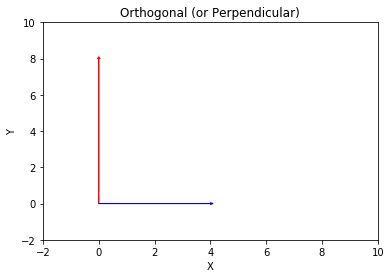

In [38]:
def plot_2d_vector(vector, color):
  plt.arrow(0, 0, vector[0], vector[1], head_width = .1, head_length = .1, color = color)
  plt.xlabel("X")
  plt.ylabel("Y")
a = [0,8]
b = [4,0]
plot_2d_vector(a, "red")
plot_2d_vector(b, "blue")
plt.title("Orthogonal (or Perpendicular)")
plt.xlim(-2, 10)
plt.ylim(-2, 10)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
def calculate_dp(a, b):
  try:
    dp = 0
    for i, j in zip(a, b):
      dp += i*j
    return dp
  except:
    print("Error: this function requires two numerical vectors of even length.")

In [55]:
a = [-5, 3, 7]
b = [6, -8, 2]
calculate_dp(a,b)

-40

These vectors are not orthogonal, as their dot product is not equal to 0. 

In [59]:
calculate_dp("fortyseven", 2)

Error: this function requires two numerical vectors of even length.


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

All of these are equal to the sum of the elements squared, or 4 + 225 + 36 + 400 = 665.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7  \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12 \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\qquad
e = 2 \begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix} + 11 \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8 \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\end{align} 

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [41]:
f = [4, 12, 11, 9, 2]
norm_f = np.linalg.norm(f)
unit_f = f / norm_f
print(unit_f)
print(np.linalg.norm(unit_f))

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]
0.9999999999999999


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

$\mathbb{R}^1$

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

Using Gaussian elimination, we obtain REF of:
 \begin{bmatrix} 1 & 2 & 3 \\ 0 & 1 & 5 \\ 0 & 0 & 1 \end{bmatrix}
 This has three pivot values; thus the matrix is of full rank, the vectors are linearly independent, and the span is $\mathbb{R}^3$.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



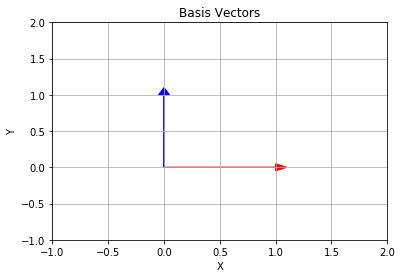

In [64]:
basis_i = [1,0]
basis_j = [0,1]
plot_2d_vector(basis_i, "red")
plot_2d_vector(basis_j, "blue")
plt.title("Basis Vectors")
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.grid(True)
plt.show()

## 6.2 What does it mean to form a basis?

Vectors form a basis for vector space V if they are linearly independent and span the vector space. (For example, the two vectors above and R^2, because every point in R^2 can be formed by a linear combination of these two vectors.)

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

P has rank 3 (per the logic shown above about its reduced form).

## 7.2 What does the rank of a matrix tell us?

Rank of A tells us:

1) The dimension of the vector space spanned by its rows or columns.
2) The number of linearly independent rows/columns of the matrix.
3) The number of unique, non-degenerate solutions to the system of equations defined by Ax = b.
4) If we conceptualize multiplication by A as a graphical transformation, the rank is the dimension of the image of multiplication by A.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
def project_vector(u, v):
  coefficient = np.dot(u, v)/np.dot(v, v)
  new_vector = [coefficient * n for n in v]
  return new_vector

In [75]:
v = [1, 3]
w = [-1, 2]
projlw = project_vector(w, v)
print(projlw)
linked_vector = [(i - j) for i, j in zip(w, projlw)]
print(linked_vector)

[0.5, 1.5]
[-1.5, 0.5]


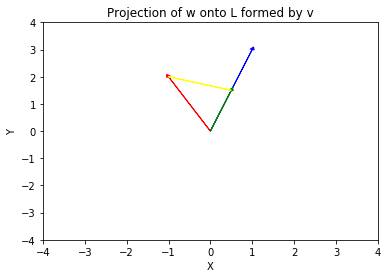

In [80]:
plot_2d_vector(v, "blue")
plot_2d_vector(w, "red")
plot_2d_vector(projlw, "green")
plt.arrow(projlw[0], projlw[1], linked_vector[0], linked_vector[1], color = "yellow")
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.title("Projection of w onto L formed by v")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()